# Assignment 7

Single-cell RNA-Seq (scRNA-Seq) data is well known for its high level of noise and sparsity.
Due to the challenges in amplifying the very low amounts of RNA present in individual cells, only
a small portion of the transcribed RNAs is captured during sequencing. This results in situations
where many genes may be active at once, and two scRNA-Seq measurements might originate
from cells with identical expression profiles despite appearing different.

In this assignment, you will implement and analyze autoencoders to extract meaningful clusters
from scRNA-Seq count data. These clusters could reflect diverse expression states within the
same tissue, such as differences arising from various cell cycle phases or distinct cell types.

# Q1: Autoencoder Training for Dimensionality Reduction [1 pts]

● Load the counts and labels.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#tf
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
# labels is a text file with cluster labels of the cells, which fall into a total
# of 3 clusters
label_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_7/labels.txt'
labels_data = pd.read_csv(label_path, header=None)
labels_data.columns=["labels"]

# counts is a gene expression matrix of scRNA-Seq data with dimensions corresponding
# to 5000 cells by 1000 genes. The entry eij indicates the expression level
# of the j-th gene in the i-th cell. 
count_path = '/Users/peytonhall/Documents/spring_2025/qbio_465/assignment_7/counts.npy'
count_data = np.load(count_path)

In [3]:
#check loading

print(labels_data.shape)
print(count_data.shape)
# 5000 cells, 1000 genes per cell

(5000, 1)
(5000, 1000)


● Train a fully connected autoencoder to learn a low-dimensional representation of the gene expression data.

● Use two different latent space sizes: 10 and 50 (i.e., build two separate models).

● Use Mean Squared Error (MSE) as the loss function.

● Train the model for approximately 50 epochs (adjust as needed for optimal results).

● Report the training and testing history plots.

In [4]:
# split data
X_train, X_test = train_test_split(count_data, test_size=0.2, random_state=42)

In [48]:
# define autoencoder architecture
def build_autoencoder(input_dim, latent_dim):
    # encoder
    # will be 1000 in input_dim
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(100, activation='relu')(input_layer)
    latent = Dense(latent_dim)(encoded)  # no activation

    # decoder
    decoded = Dense(100, activation='relu')(latent)
    output_layer = Dense(input_dim)(decoded)  # no activation

    # autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    
    # encoder model
    encoder = Model(inputs=input_layer, outputs=latent)
    
    # compile
    # mse as loss function
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder, encoder

In [14]:
# Use two different latent space sizes: 10 and 50 (i.e., build two separate models).
latent_dims = [10, 50]
# 10 would be symmetric like 1000 (input) -> 100 > 10 (latent)
history_dict = {}

for i in latent_dims:
    print(f"\ntraining autoencoder with latent dim = {i}")
    # 1000 genes per cell 
    model = build_autoencoder(input_dim=1000, latent_dim=i)
    history = model.fit(
        X_train, X_train,
        validation_data=(X_test, X_test),
        # 50 epochs
        epochs=50,
        batch_size=128,
        verbose=1
    )
    history_dict[i] = history
    mse = mean_squared_error(X_test.flatten(), model.predict(X_test).flatten())
    print(f'latent dim {i} MSE: {mse:.3f}')


training autoencoder with latent dim = 10
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.2962 - val_loss: 2.8406
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7559 - val_loss: 2.6480
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6530 - val_loss: 2.6293
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6410 - val_loss: 2.6252
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6328 - val_loss: 2.6218
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6307 - val_loss: 2.6205
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6294 - val_loss: 2.6176
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6237 - val_loss: 2.6144
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6113 - val_loss: 2.6114
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6272 - val_loss: 2.6095
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6210 - val_loss: 2.6076
Epoch 12/50
32/32 ━━━━━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5885 - val_loss: 2.5814
Epoch 19/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5807 - val_loss: 2.5769
Epoch 20/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5750 - val_loss: 2.5716
Epoch 21/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5715 - val_loss: 2.5684
Epoch 22/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5681 - val_loss: 2.5653
Epoch 23/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5612 - val_loss: 2.5616
Epoch 24/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5607 - val_loss: 2.5581
Epoch 25/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5596 - val_loss: 2.5541
Epoch 26/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5513 - val_loss: 2.5527
Epoch 27/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5508 - val_loss: 2.5502
Epoch 28/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5423 - val_loss: 2.5462
Epoch 29/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5409 - val_loss:

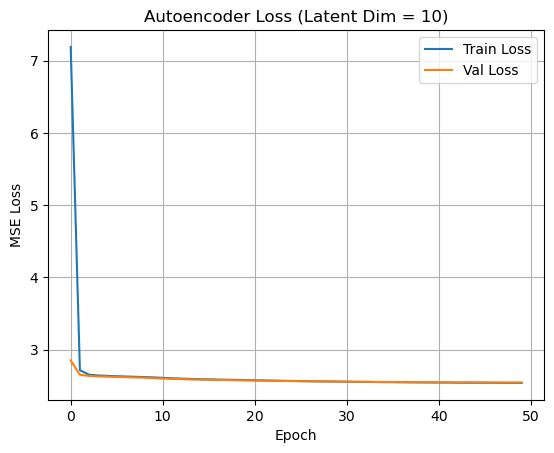

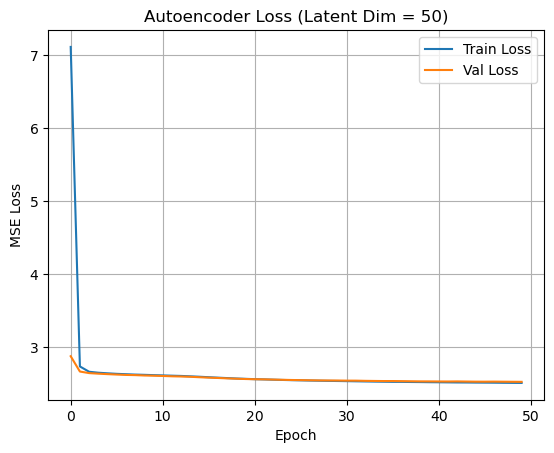

In [7]:
# plotting
for i, history in history_dict.items():
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"Autoencoder Loss (Latent Dim = {i})")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Q2: Reconstruction Error Analysis [1 pts]

● Compare the training and testing history plots for the models with latent space sizes of
10 and 50.

The training and testing plots for latent space size of 10 shows a decrease in mean squared error from training to validation. The plots for a latent space of 50 shows this decrease as well. These indicate good convergence. However, the model with latent space of 10 seems to converge quicker. This could be because the smaller model has less parameters and a simpler structure. 

● Report the MSE between the reconstructed data and the original data for each latent
space size.

the MSE for latent space of 10 is  2.545 and is 2.519 for a space of 50. Increased latent space size impacts the reconstruction error by increasing a models ability to capture complex patterns and this might take more time. Thus, a model might achieve a lower final MSE despite converging slower. 

# Q3: Visualization of Reconstructions [2 pts]

● Using the autoencoder with a latent space size of 10, create the following visualizations:

    ○ Generate PCA plots comparing the original data to the reconstructed data.
    ○ Generate t-SNE plots comparing the original data to the reconstructed data.

● Use labels.txt as labels when plotting.

● Compare the PCA and t-SNE visualizations between the original and reconstructed data.

In [26]:
X = count_data

In [29]:
# train the autoencoder
autoencoder_10, encoder_10 = build_autoencoder(input_dim=1000, latent_dim=10)
autoencoder_10.fit(X,X, epochs=50, batch_size=32, validation_split=0.2)
# reconstruct the data
reconstruct = autoencoder_10.predict(X)

#PCA
# encode
pca_orig = PCA(n_components=2)
X_pca = pca_orig.fit_transform(X)

# decode
pca_recon = PCA(n_components=2)
reconstruct_pca = pca_recon.fit_transform(reconstruct)

#t-SNE
tsne_orig = TSNE(n_components=2, random_state=42)
X_tsne = tsne_orig.fit_transform(X)

tsne_recon = TSNE(n_components=2, random_state=42)
reconstruct_tsne = tsne_recon.fit_transform(reconstruct)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5353 - val_loss: 2.6461
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6352 - val_loss: 2.6404
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6357 - val_loss: 2.6323
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6219 - val_loss: 2.6291
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6230 - val_loss: 2.6126
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6093 - val_loss: 2.5992
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5908 - val_loss: 2.5889
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5800 - val_loss: 2.5824
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5760 - val_loss: 2.5763
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5716 - val_loss: 2.5712
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5634 - val_loss: 2.5698
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


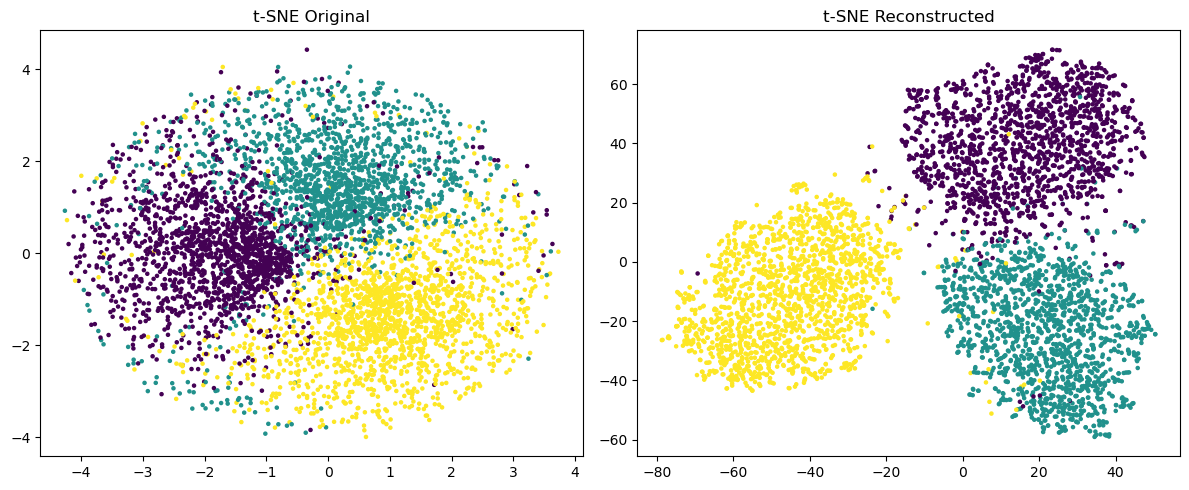

In [36]:
# plot t-SNE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("t-SNE Original")
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

plt.subplot(1,2,2)
plt.title("t-SNE Reconstructed")
plt.scatter(reconstruct_tsne[:,0],reconstruct_tsne[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)


plt.tight_layout()
plt.show()

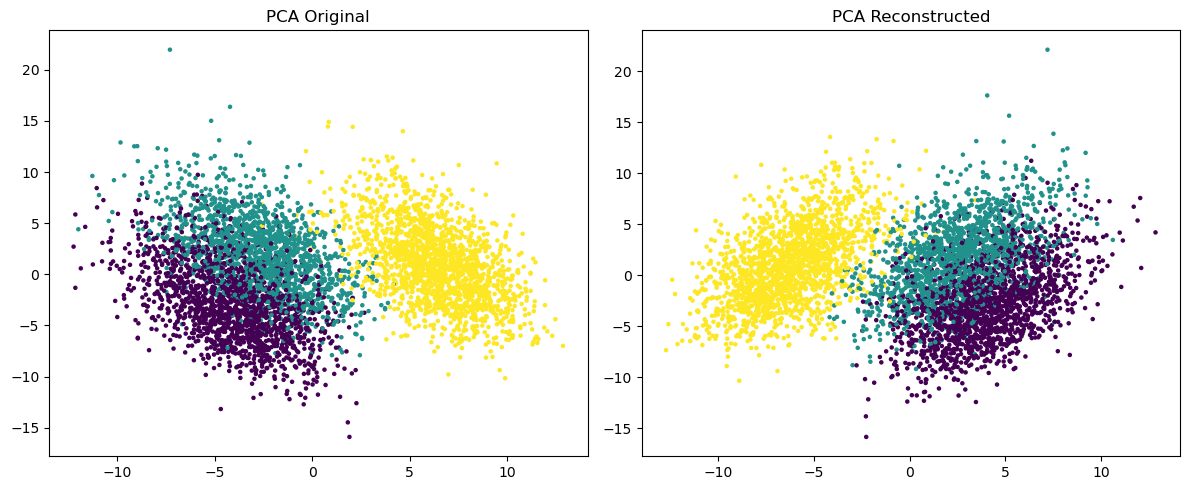

In [37]:
# plot PCA
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("PCA Original")
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

plt.subplot(1,2,2)
plt.title("PCA Reconstructed")
plt.scatter(reconstruct_pca[:,0],reconstruct_pca[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)


plt.tight_layout()
plt.show()

● Discuss any observable differences in clustering between the original and reconstructed data for PCA and t-SNE.

Between the PCA and t-SNE clustering, there is improved clustering by t-SNE in the reconstructed data, as the PCA clusters remain relatively the same across. This suggests that the global structure of the data is preserved during reconstruction. The improved clustering in the t-SNE shows that the autoencoder could have better emphasized meaningful features that capture the cell state (1, 2, or 3). 


● Explain possible reasons for these differences based on the autoencoder's reconstruction process.

A reason for the differences in the reconstruction for t-SNE and PCA is that PCA is a linear model and might not have been able to effectively capture meaningful patterns during noise and reconstruction. t-SNE on the other hand is non-linear and focuses on preserving lcoal structures, possibly contributing to its more refined clustering after reconstruction. 

# Q4: Latent Space Visualization with 2-Dimensional Latent Space [1 pts]

● Retrain the autoencoder with a latent space of 2 dimensions.

● Extract the 2-dimensional latent representations.

● Create a 2D scatter plot of the latent space, using labels.txt to color-code the clusters.

In [49]:
# retain with latent space of 2 dims
autoencoder_2, encoder_2 = build_autoencoder(input_dim=1000, latent_dim=2)
autoencoder_2.fit(X, X, epochs=50, batch_size=32, validation_split=0.2)

latent_recon = encoder_2.predict(X)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8398 - val_loss: 2.6383
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6328 - val_loss: 2.6360
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6379 - val_loss: 2.6347
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6338 - val_loss: 2.6338
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6281 - val_loss: 2.6214
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6131 - val_loss: 2.6124
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6161 - val_loss: 2.6088
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6018 - val_loss: 2.6126
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5959 - val_loss: 2.6060
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5951 - val_loss: 2.6065
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6014 - val_loss: 2.6043
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

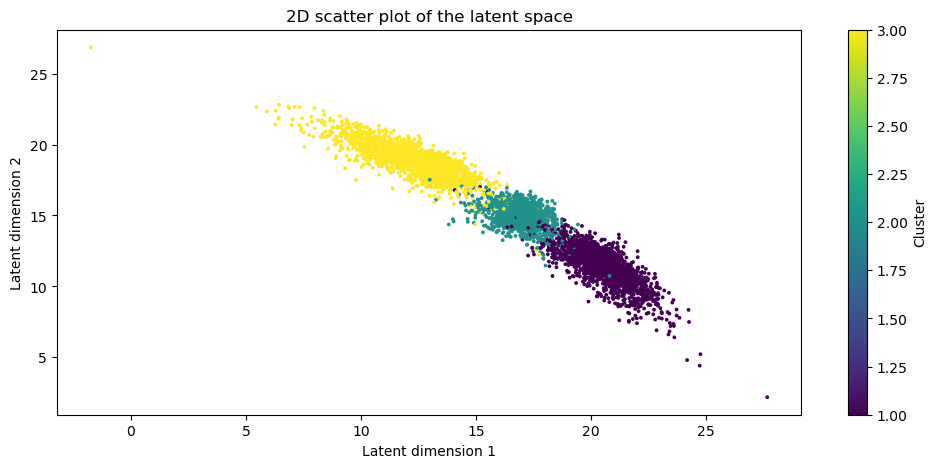

In [50]:
# plotting
plt.figure(figsize=(12,5))

plt.title("2D scatter plot of the latent space")
plt.scatter(latent_recon[:, 0],latent_recon[:, 1],c=labels_data.to_numpy(),cmap="viridis",s=3)
plt.xlabel("Latent dimension 1")
plt.ylabel("Latent dimension 2")
plt.colorbar(label="Cluster")
plt.show()

Discuss the observed clustering in the 2D latent space, including how well the clusters are separated and what the results suggest about the autoencoder’s ability to capture the underlying structure of the data.


The clustering for 1, 2, and 3 is mostly refined with some overlap between the three labels. 1 seems to have a higher latent space for dimension 1 and a lower one for dimension 2. 3 seems to have a higher latent space for dimension 2 and a lower one for dimension 1. 2 is between the two, with moderate latent spaces for both dimensions. 

# Q5: Alternative Loss Function Experiment [2 pts]

The new loss function, nonzero_mse_loss, computes the MSE only over the nonzero
elements of the input data. This is particularly useful for sparse datasets (like scRNA-seq) where
zeros are prevalent and may not carry meaningful signals. By ignoring zeros, the loss focuses
on capturing errors where there is actual gene expression data, potentially leading to improved
learning of meaningful features.

● Replace the MSE loss with the following custom loss function when training the
autoencoder (using a latent space size of 10):

import tensorflow as tf
def nonzero_mse_loss(y_true, y_pred):
#Create a mask for non-zero elements
mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
nonzero_count = tf.reduce_sum(mask) # Count the number of non-zero elements
#Calculate the squared difference for non-zero elements
nonzero_squared_diff = tf.square(y_true - y_pred * mask)
#Compute the mean of the non-zero squared differences
nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count
return nonzero_mse

● After training with this alternative loss, do the following:

● Compare the reconstruction MSE from this experiment with the MSE reported in Q2.

● Generate the following four plots:

    ○ PCA plot: Reconstructed data vs. Original data.
    
    ○ PCA plot: Latent embeddings vs. Original data.
    
    ○ t-SNE plot: Reconstructed data vs. Original data.
    
    ○ t-SNE plot: Latent embeddings vs. Original data.

In [51]:
def nonzero_mse_loss(y_true, y_pred):
    # Create a mask for non-zero elements
    mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
    nonzero_count = tf.reduce_sum(mask) # Count the number of non-zero elements
    # Calculate the squared difference for non-zero elements
    nonzero_squared_diff = tf.square(y_true - y_pred * mask)
    # Compute the mean of the non-zero squared differences
    nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count
    return nonzero_mse

In [52]:
# build the model with latent size of 10
autoencoder_10_5, encoder_10_5 = build_autoencoder(input_dim=1000, latent_dim=10)
autoencoder_10_5.fit(X,X, epochs=50, batch_size=32, validation_split=0.2)

autoencoder_10_5.compile(optimizer='adam', loss=nonzero_mse_loss)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4942 - val_loss: 2.6537
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6486 - val_loss: 2.6396
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6349 - val_loss: 2.6318
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6251 - val_loss: 2.6124
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6016 - val_loss: 2.5980
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5864 - val_loss: 2.5878
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5719 - val_loss: 2.5811
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5718 - val_loss: 2.5765
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5675 - val_loss: 2.5729
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5706 - val_loss: 2.5699
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5575 - val_loss: 2.5665
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [54]:
reconstruct_5 = autoencoder_10_5.predict(X)

mse_nonzero = nonzero_mse_loss(X, reconstruct_5).numpy()

print(f"Reconstructed MSE with nonzero MSE loss: {mse_nonzero:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
Reconstructed MSE with nonzero MSE loss: 1.468


In comparison to the reconstructed MSE reported in question 2 for the latent space size of 10 was 2.545, the reconstructed MSE for the latent space size of 10 using the nonzero MSE loss is 1.468, showing an improvement in model performance. 

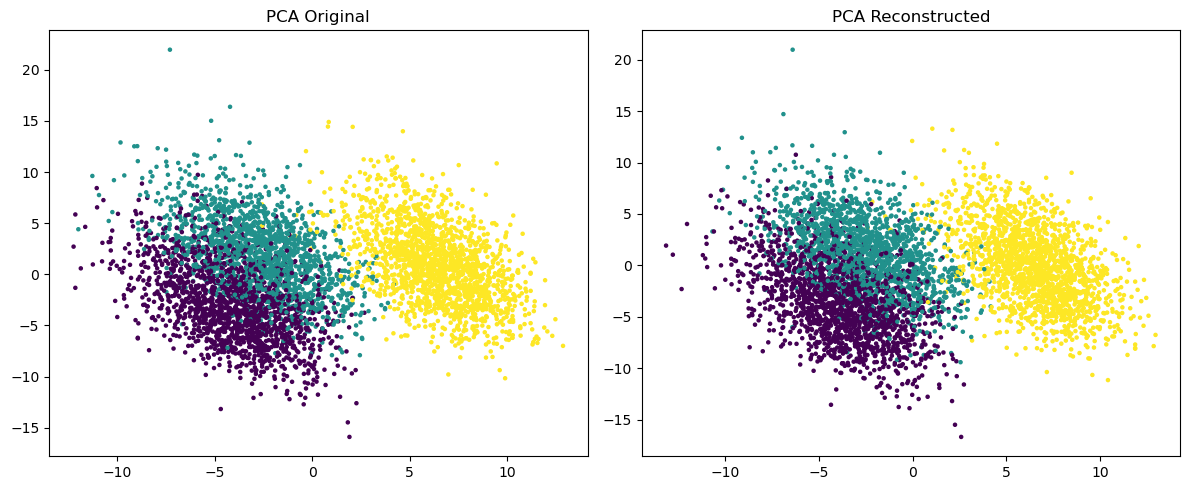

In [58]:
# plots
# PCA plot: Reconstructed data vs. Original data.
reconstruct_pca_5 = pca_orig.transform(reconstruct_5)

#plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

# og
plt.title("PCA Original")
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

# reconstruct
plt.subplot(1,2,2)
plt.title("PCA Reconstructed")
plt.scatter(reconstruct_pca_5[:,0],reconstruct_pca_5[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

plt.tight_layout()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


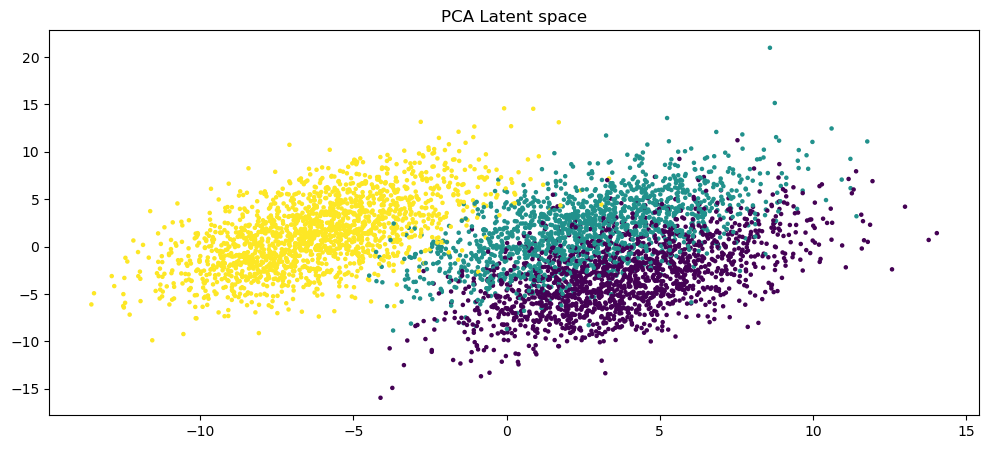

In [60]:
# PCA plot: Latent embeddings vs. Original data.
latent_rep_5 = autoencoder_10_5.predict(X)

# pca for latent space
latent_pca = pca_orig.fit_transform(latent_rep_5)

#plotting
plt.figure(figsize=(12,5))
plt.scatter(latent_pca[:,0],latent_pca[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)
plt.title("PCA Latent space")
plt.show()

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


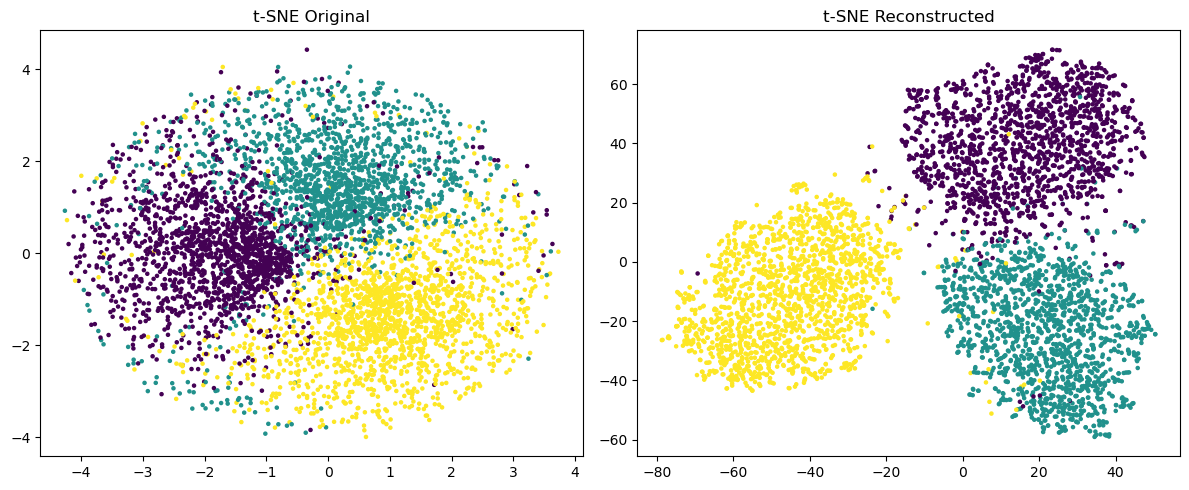

In [61]:
# t-SNE plot: Reconstructed data vs. Original data.
reconstrct_tsne = tsne_orig.fit_transform(reconstruct_5)

#plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

# og
plt.title("t-SNE Original")
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

# reconstruct
plt.subplot(1,2,2)
plt.title("t-SNE Reconstructed")
plt.scatter(reconstruct_tsne[:,0],reconstruct_tsne[:,1],c=labels_data.to_numpy(),cmap="viridis",s=5)

plt.tight_layout()
plt.show()

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


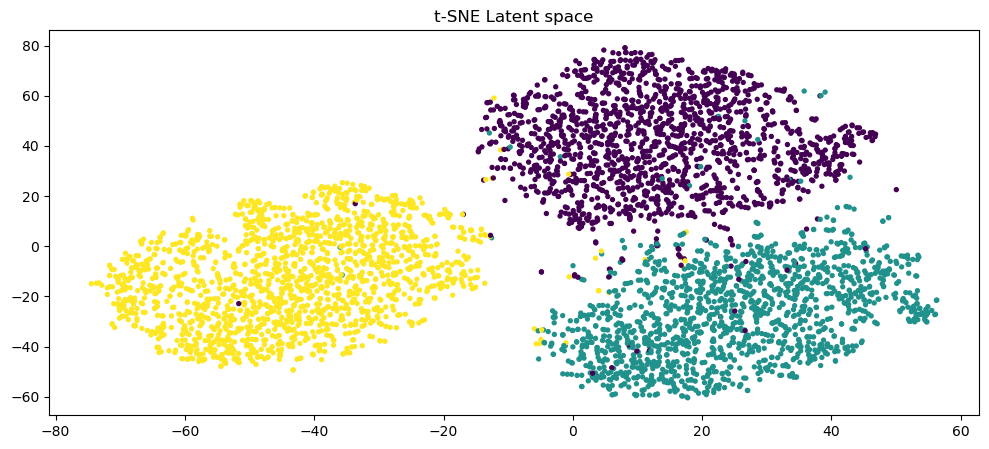

In [63]:
# t-SNE plot: Latent embeddings vs. Original data.
latent_tsne = tsne_orig.fit_transform(latent_rep_5)

#plotting
plt.figure(figsize=(12,5))
plt.scatter(latent_tsne[:,0],latent_tsne[:,1],c=labels_data.to_numpy(),cmap="viridis",s=8)
plt.title("t-SNE Latent space")
plt.show()

Discuss any observed differences, noting if the model with the new loss better captures the relevant structure in the data by focusing on nonzero values. 

The model with the new loss does seem to have improved clustering, especially for t-SNE. This suggests that focusing on nonzero values might have helped the autoencoder to learn more meaningful representations of the data. Also, it is indicated that latent features may capture biological variation more effectively in the t-SNE clustering. 